# Import Libraries

In [ ]:
import re
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load your dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/amazon_reviews_multilingual_FR_v1_00.tsv', sep='\t')

# Check column names

In [ ]:
print(df.columns)

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date'],
      dtype='object')


# Display Sample Data

In [ ]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,FR,14952,R32VYUWDIB5LKE,0552774294,362925721,The God Delusion,Books,5,0,0,N,Y,a propos de ce livre,je conseille fortement ce bouquin à ceux qui s...,2013-02-13
1,FR,14952,R3CCMP4EV6HAVL,B004GJXQ20,268067011,"A Game of Thrones (A Song of Ice and Fire, Boo...",Digital_Ebook_Purchase,5,0,0,N,Y,wow,"ce magnifique est livre , les personnages sont...",2014-08-03
2,FR,17564,R14NAE6UGTVTA2,B00GIGGS6A,256731097,Huion H610 PRO,PC,3,1,3,N,Y,Ca fait le job,Je dirais qu'il a un défaut :<br />On ne peut ...,2015-07-07
3,FR,18940,R2E7QEWSC6EWFA,B00CW7KK9K,977480037,Withings Pulse - Suivi d'activité + Analyse du...,Sports,4,0,1,N,Y,Fidele a description,Je l'ai depuis quelques jours et j'en suis trè...,2014-06-16
4,FR,20315,R26E6I47GQRYKR,B002L6SKIK,827187473,Prometheus,Video DVD,2,3,5,N,N,décevant,"je m'attendait à un bon film, car j'aime beauc...",2013-06-10


# Check Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253961 entries, 0 to 253960
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   marketplace        253961 non-null  object
 1   customer_id        253961 non-null  int64 
 2   review_id          253961 non-null  object
 3   product_id         253961 non-null  object
 4   product_parent     253961 non-null  int64 
 5   product_title      253961 non-null  object
 6   product_category   253961 non-null  object
 7   star_rating        253961 non-null  int64 
 8   helpful_votes      253961 non-null  int64 
 9   total_votes        253961 non-null  int64 
 10  vine               253961 non-null  object
 11  verified_purchase  253961 non-null  object
 12  review_headline    253955 non-null  object
 13  review_body        253961 non-null  object
 14  review_date        253955 non-null  object
dtypes: int64(5), object(10)
memory usage: 29.1+ MB


# Handle Missing Values

In [ ]:
df.isnull().sum()

,0
marketplace,0
customer_id,0
review_id,0
product_id,0
product_parent,0
product_title,0
product_category,0
star_rating,0
helpful_votes,0
total_votes,0


In [ ]:
# Drop rows with missing 'review_body' or 'star_rating'
df.dropna(subset=['review_date'], inplace=True)

In [ ]:
df.fillna('Unknown', inplace=True)

In [ ]:
df.isnull().sum()

,0
marketplace,0
customer_id,0
review_id,0
product_id,0
product_parent,0
product_title,0
product_category,0
star_rating,0
helpful_votes,0
total_votes,0


# Word Cloud of Review Texts

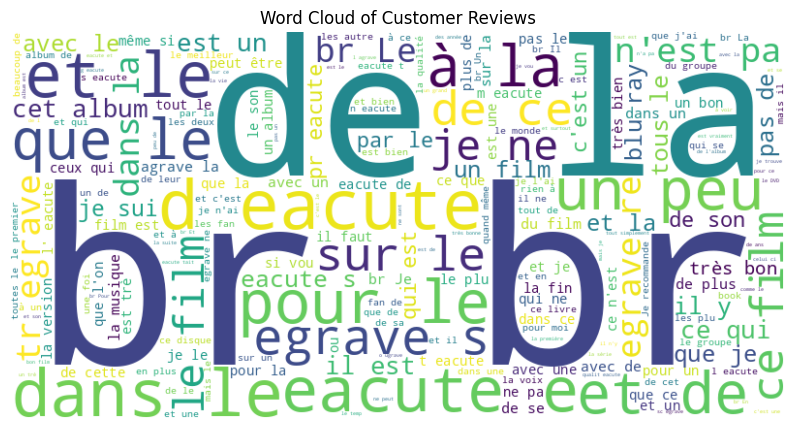

In [ ]:
# Concatenate all reviews into a single string
all_reviews = ' '.join(review for review in df['review_body'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for word cloud
plt.title('Word Cloud of Customer Reviews')
plt.show()

# Text Preprocessing

In [ ]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.strip()  # Remove leading and trailing whitespace
    return text

df['cleaned_review'] = df['review_body'].apply(clean_text)

# Create a sentiment column based on star_rating

In [ ]:
def map_rating_to_sentiment(rating):
    if rating >= 4:
        return 'happy'
    elif rating == 3:
        return 'neutral'
    else:
        return 'sad'

df['sentiment'] = df['star_rating'].apply(map_rating_to_sentiment)

# Preprocess and prepare data

In [ ]:
X = df['cleaned_review']

In [ ]:
y = df['sentiment']

# Distribution of Sentiment Classes

<ipython-input-15-36b8629c49d0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


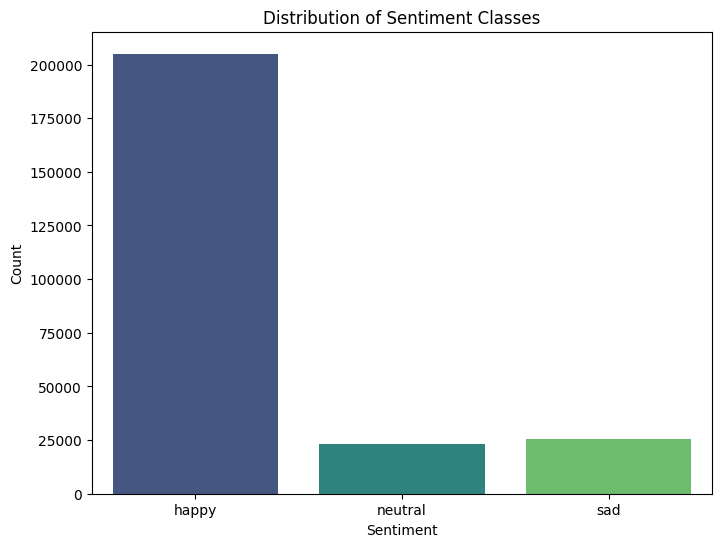

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette='viridis')
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
happy,205041
sad,25637
neutral,23277


# Convert text to features

In [ ]:
vectorizer = TfidfVectorizer()
X_features = vectorizer.fit_transform(X)

# Split data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2)

# Visualize Data Split

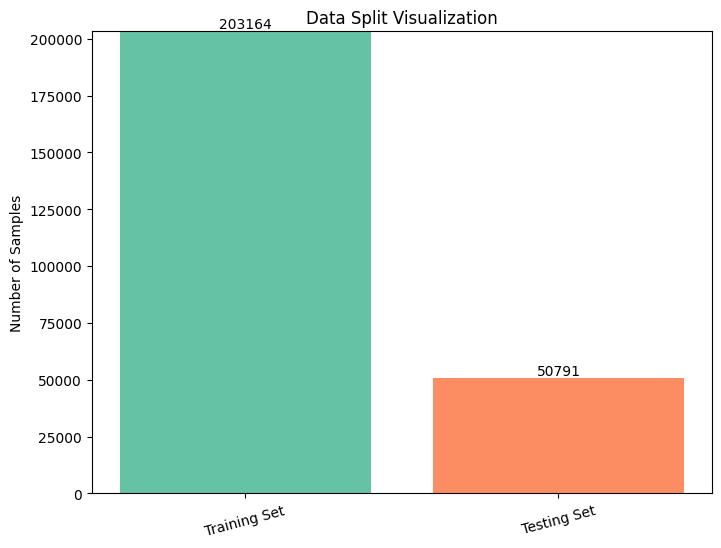

In [ ]:
# Get the sizes of the training and testing sets using the shape attribute
train_size = X_train.shape[0]
test_size = X_test.shape[0]

# Prepare data for visualization
sizes = [train_size, test_size]
labels = ['Training Set', 'Testing Set']

# Visualize the data split using a bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color=['#66c2a5', '#fc8d62'])
plt.title('Data Split Visualization')
plt.ylabel('Number of Samples')
plt.xticks(rotation=15)
plt.ylim(0, max(sizes) + 50)  # Optional: add a little padding to the y-axis
for i, size in enumerate(sizes):
    plt.text(i, size + 3, str(size), ha='center', va='bottom')
    # Annotate bar with its size

plt.show()

# Apply SMOTE to balance the classes

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the logistic regression model with balanced class weights
model = LogisticRegression(class_weight='balanced', random_state=42)

# Train the model on the resampled data
model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred, target_names=['sad', 'neutral',
                                                          'happy']))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         sad       0.95      0.82      0.88     40996
     neutral       0.25      0.49      0.33      4699
       happy       0.54      0.68      0.60      5096

    accuracy                           0.77     50791
   macro avg       0.58      0.66      0.60     50791
weighted avg       0.84      0.77      0.80     50791



# Train LogisticRegression model

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Make predictions

In [ ]:
y_pred = model.predict(X_test)

# Performance Metrics

In [ ]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
# Adjust average as needed
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8550333720541041
Precision: 0.8247808281403226
Recall: 0.8550333720541041
F1 Score: 0.8282273036907956
Confusion Matrix:
 [[40053   457   486]
 [ 3448   678   573]
 [ 2103   296  2697]]


# Confusion Matrix Heatmap

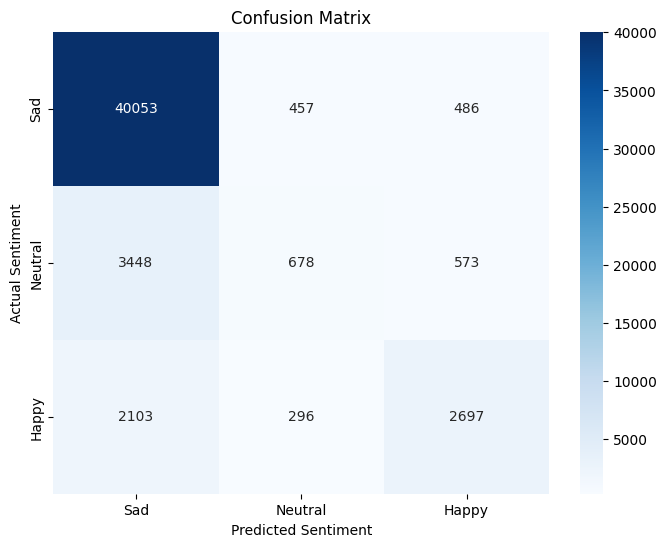

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Sad', 'Neutral', 'Happy'], yticklabels=['Sad',
                                                                  'Neutral',
                                                                  'Happy'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.show()

# Model Performance Metrics Bar Plot

<ipython-input-26-1717672629de>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


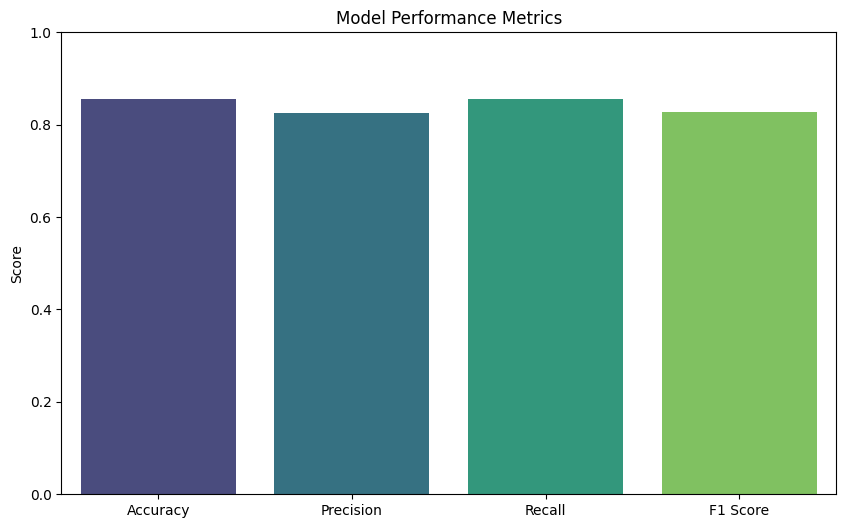

In [ ]:
# Performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit to 1 for better visibility
plt.show()

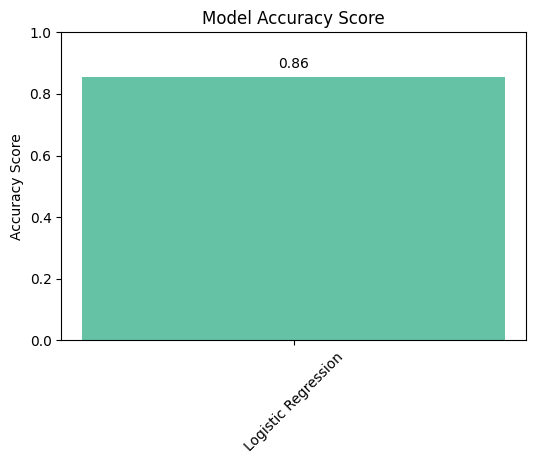

In [ ]:
# Prepare data for visualization
accuracy_score = [accuracy]
labels = ['Logistic Regression']

# Create a bar chart
plt.figure(figsize=(6, 4))
plt.bar(labels, accuracy_score, color='#66c2a5')
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.title('Model Accuracy Score')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)

# Annotate the bar with the accuracy score
for i, score in enumerate(accuracy_score):
    plt.text(i, score + 0.02, f'{score:.2f}', ha='center', va='bottom')

plt.show()

# Save the model and vectorizer

In [ ]:
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

In [ ]:
pip install fastapi uvicorn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.6 MB/s eta 0:00:00


In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
import pickle
import uvicorn

# Initialize FastAPI app
app = FastAPI()

# Load model and vectorizer
model = pickle.load(open('model.pkl', 'rb'))
vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))

# Define request body structure using Pydantic
class Review(BaseModel):
    review_body: str

# Create a POST endpoint
@app.post("/predict")
async def predict(review: Review):
    review_text = review.review_body
    features = vectorizer.transform([review_text])
    prediction = model.predict(features)
    sentiment = prediction[0]
    # Assuming sentiment labels are 'sad', 'neutral', 'happy'
    return {"sentiment": sentiment}

In [ ]:
import threading
import uvicorn

def run_app():
    uvicorn.run(app, host="0.0.0.0", port=5000)

# Start FastAPI in a background thread
thread = threading.Thread(target=run_app, daemon=True)
thread.start()

In [ ]:
import requests

# Sample review data to send
review_data = {
    "review_body": "Le produit est excellent et je suis très content de mon achat."
}

# Send a POST request
response = requests.post("http://127.0.0.1:5000/predict", json=review_data)

# Print the response from the API
print(response.json())

INFO:     Started server process [6639]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:5000 (Press CTRL+C to quit)


INFO:     127.0.0.1:59168 - "POST /predict HTTP/1.1" 200 OK
{'sentiment': 'happy'}


In [ ]:
pip install tensorflow keras scikit-learn imbalanced-learn

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Tokenize the text data
tokenizer = Tokenizer(num_words=20000)  # Set vocabulary size
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

# Pad sequences to ensure equal length for all inputs
X_pad = pad_sequences(X_seq, maxlen=200)  # Maximum sequence length

# Encode labels (Convert to numeric)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)


In [ ]:
from imblearn.over_sampling import SMOTE

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_encoded,
                                                    test_size=0.2,
                                                    random_state=42)

# Apply SMOTE on training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()

# Add an Embedding layer
model.add(Embedding(input_dim=20000, output_dim=128, input_length=200))

# Add an LSTM layer with dropout to prevent overfitting
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

# Add a fully connected layer with 3 output units for 'sad', 'neutral', 'happy'
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

# Summary of the model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=5,
                    batch_size=2048, validation_data=(X_test, y_test))

Epoch 1/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 107s 443ms/step - accuracy: 0.6079 - loss: 0.7160 - val_accuracy: 0.8143 - val_loss: 0.5147
Epoch 2/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 96s 399ms/step - accuracy: 0.6326 - loss: 0.6493 - val_accuracy: 0.8292 - val_loss: 0.4755
Epoch 3/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 96s 396ms/step - accuracy: 0.6487 - loss: 0.6187 - val_accuracy: 0.8309 - val_loss: 0.4697
Epoch 4/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 142s 399ms/step - accuracy: 0.6610 - loss: 0.6010 - val_accuracy: 0.8333 - val_loss: 0.4608
Epoch 5/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 140s 392ms/step - accuracy: 0.6753 - loss: 0.5812 - val_accuracy: 0.8384 - val_loss: 0.4463


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

1588/1588 ━━━━━━━━━━━━━━━━━━━━ 151s 95ms/step - accuracy: 0.8380 - loss: 0.4474
Test Accuracy: 83.84%


In [ ]:
class_weights = {0: 1., 1: 5., 2: 5.}  # Adjust based on class distribution
model.fit(X_train_resampled, y_train_resampled, epochs=5, batch_size=2048,
          class_weight=class_weights)

Epoch 1/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 103s 427ms/step - accuracy: 0.6308 - loss: 2.6217
Epoch 2/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 131s 383ms/step - accuracy: 0.6687 - loss: 2.4584
Epoch 3/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 94s 389ms/step - accuracy: 0.6801 - loss: 2.3912
Epoch 4/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 140s 379ms/step - accuracy: 0.6908 - loss: 2.3309
Epoch 5/5
241/241 ━━━━━━━━━━━━━━━━━━━━ 93s 386ms/step - accuracy: 0.7021 - loss: 2.2800


1588/1588 ━━━━━━━━━━━━━━━━━━━━ 162s 102ms/step


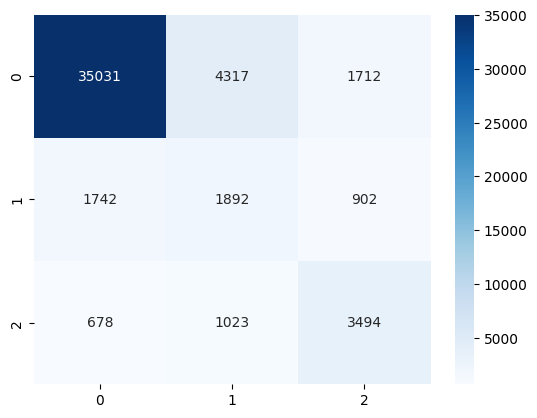

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test).argmax(axis=1)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

1588/1588 ━━━━━━━━━━━━━━━━━━━━ 143s 90ms/step - accuracy: 0.7970 - loss: 0.5479
Test Accuracy: 79.58%
